In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/CarPrice.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<AxesSubplot:>

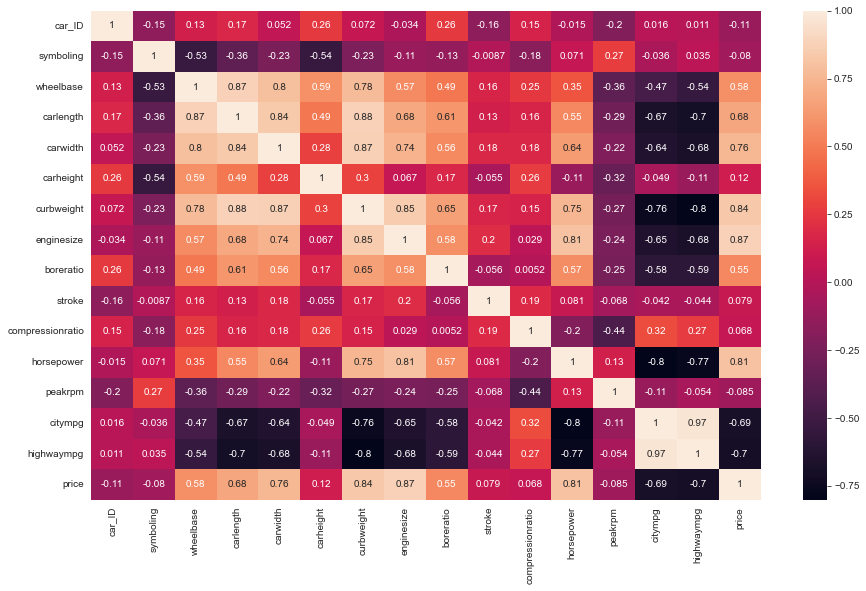

In [4]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

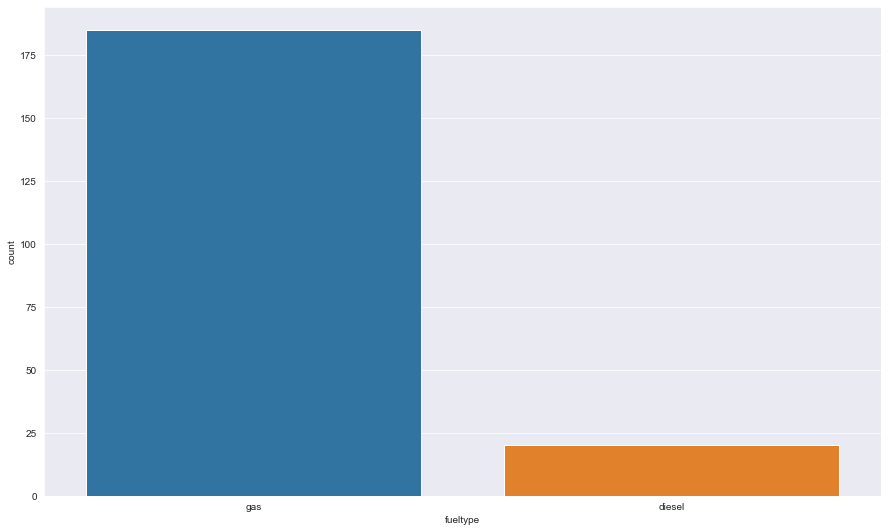

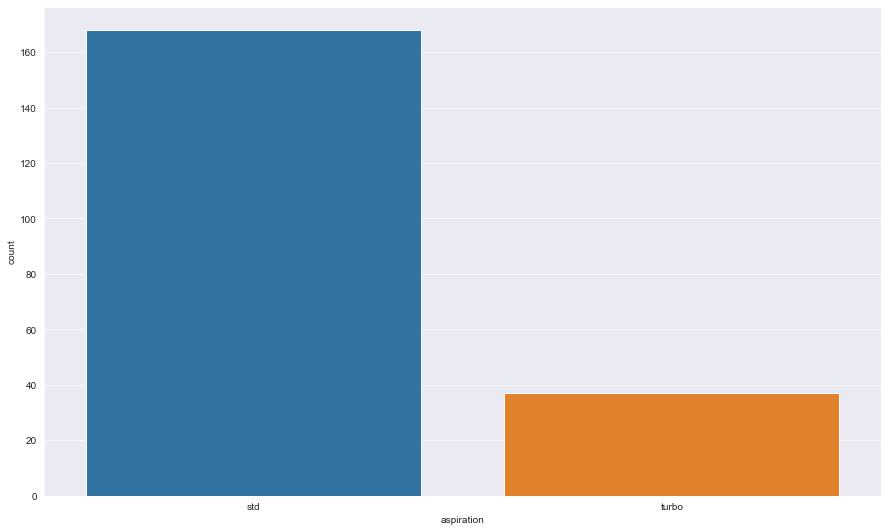

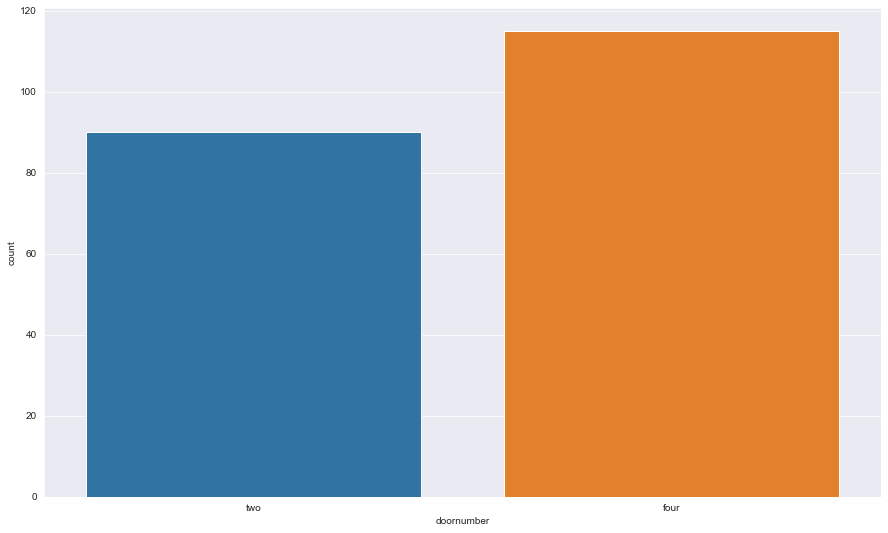

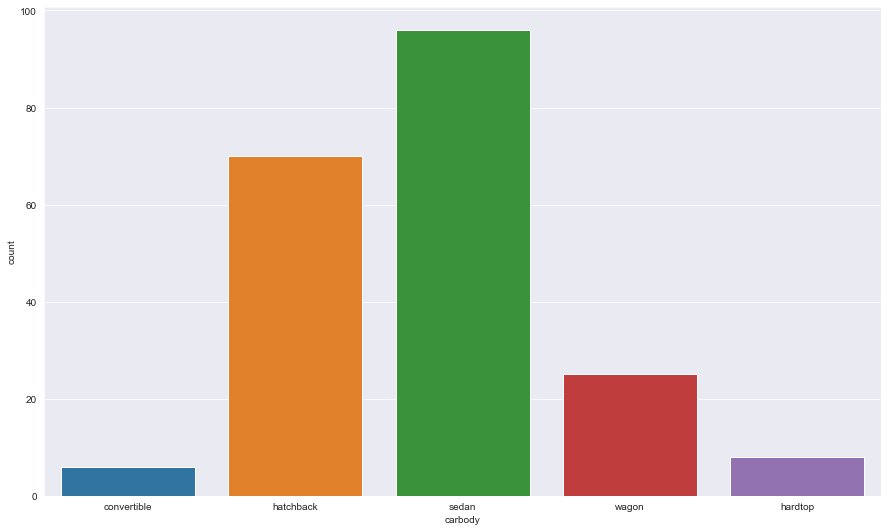

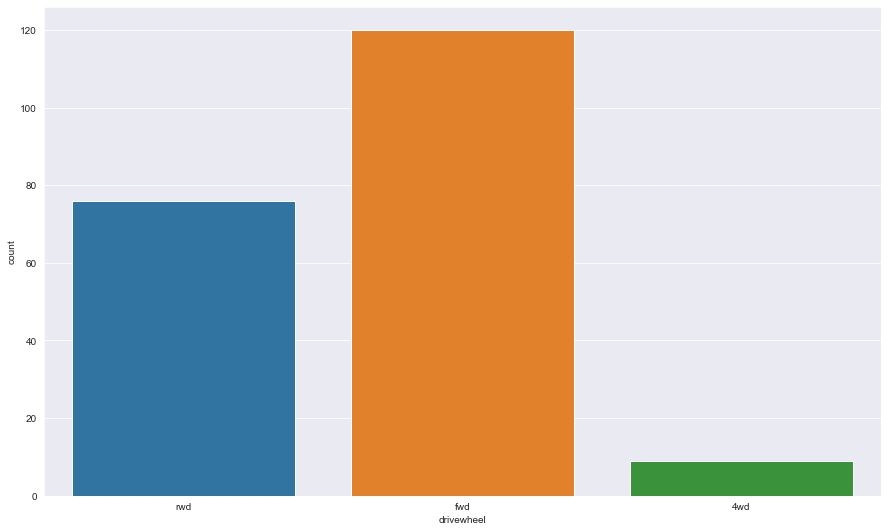

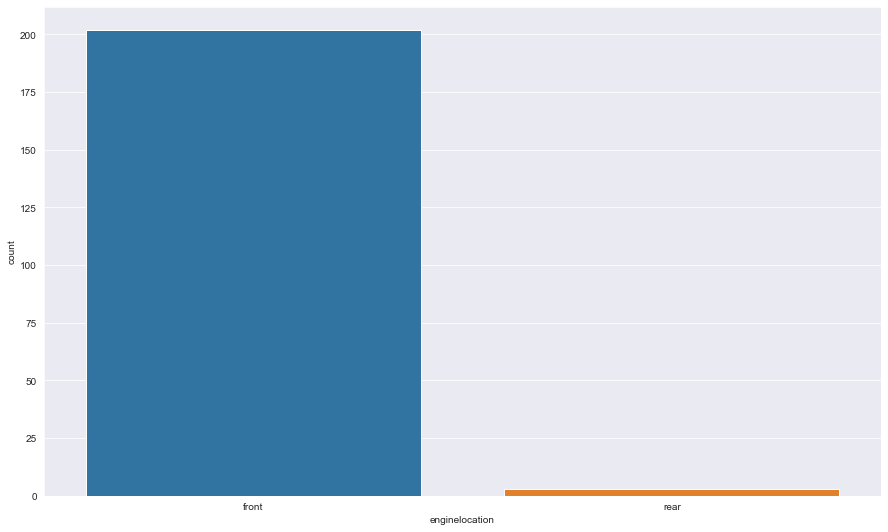

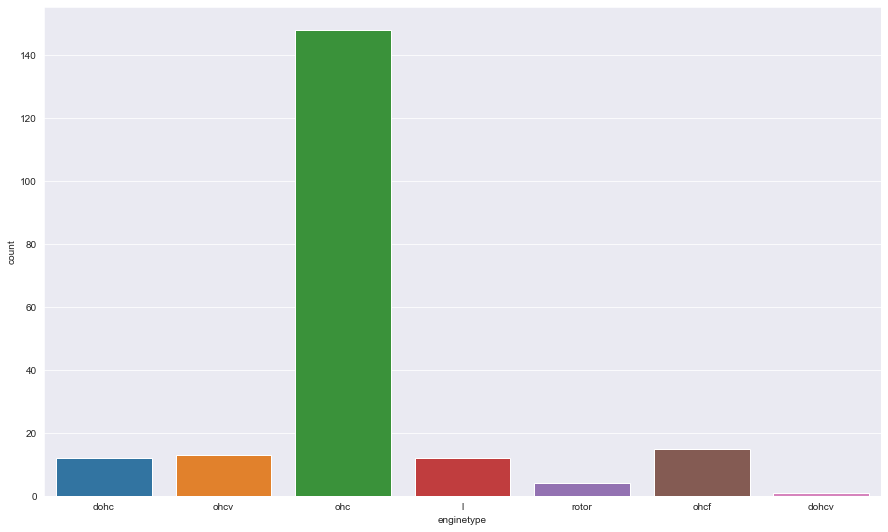

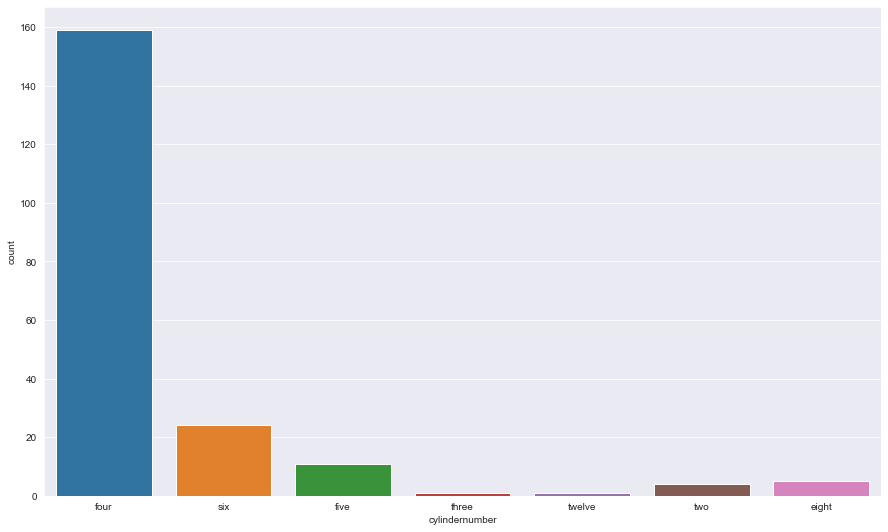

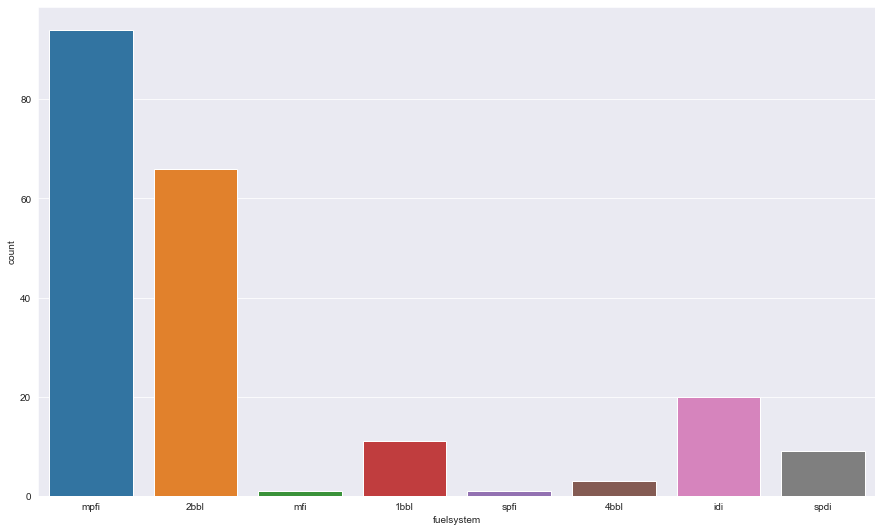

In [7]:
for col in df.select_dtypes(include=['object','bool']).columns:
    if col != 'CarName':
        plt.figure(figsize=(15,9))
        sns.countplot(data=df, x=col)
        plt.show()

In [8]:
df.isnull().sum().sort_values(ascending=False)

car_ID              0
symboling           0
highwaympg          0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
enginetype          0
curbweight          0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
fueltype            0
CarName             0
price               0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
df = df.iloc[:,3:]
for col in df.select_dtypes(include=['object','bool']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestRegressor,VotingRegressor

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import NuSVR,SVR

from sklearn.metrics import mean_squared_error,r2_score

models = {'Discriminante Lineare':LinearRegression(),
          'Ridge(Penalizzazione L2)': GridSearchCV(Ridge(random_state=45),{'alpha':[1.0,3.0,5.0,7.0,9.0,10.0]}),
          'Lasso(Penalizzazione L1)': GridSearchCV(Lasso(random_state=45),{'alpha':[1.0,3.0,5.0,7.0,9.0,10.0]}),
          'SVM':GridSearchCV(SVR(kernel='linear'),{'C':[0.001,0.01,0.1,1.0,10.0],'epsilon':[0.001,0.01,0.1,1.0,3.0]}),
          'NuSVM':GridSearchCV(NuSVR(kernel='linear'),{'C':[0.001,0.01,0.1,1.0,10.0]})
          }
vote = VotingRegressor(estimators=([('lr',models['Discriminante Lineare']),
                                    ('ridge',models['Ridge(Penalizzazione L2)']),
                                    ('lasso',models['Lasso(Penalizzazione L1)']),
                                    ('svm',models['SVM']),
                                    ('nusvm',models['NuSVM'])]))

In [31]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [32]:
forest = RandomForestRegressor(n_estimators=500, random_state=0)
forest.fit(X_train,y_train)
importance = forest.feature_importances_
index = np.argsort(importance)[::-1]
for col in range(X_train.shape[1]):
    print(f'{col+1:2}) {df.columns[index[col]]:30} {importance[index[col]]}')

 1) enginesize                     0.60756258880766
 2) curbweight                     0.2828494726146846
 3) highwaympg                     0.02428975383389476
 4) horsepower                     0.017681937830490806
 5) carwidth                       0.013293999700184805
 6) carlength                      0.009071645000217256
 7) citympg                        0.008473898223921597
 8) wheelbase                      0.006620554126312315
 9) compressionratio               0.006426173129230122
10) carheight                      0.004583161562942413
11) peakrpm                        0.0038714025672859976
12) stroke                         0.0029628551051796106
13) boreratio                      0.0029400228293110426
14) fuelsystem                     0.0025674547318342536
15) carbody                        0.0017946115198723158
16) enginetype                     0.0012533047019490171
17) cylindernumber                 0.0012390510759571834
18) drivewheel                     0.00081542261

In [44]:
selected = df.columns[index[:10]]
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train[selected])
X_test_sc = sc.transform(X_test[selected])

In [45]:
for k in models.keys():
    models[k].fit(X_train_sc,y_train)
    y_pred = models[k].predict(X_test_sc)
    print(f'{k:35} MSE:{mean_squared_error(y_test,y_pred):.3f} R2:{r2_score(y_test,y_pred):.3f}')
vote.fit(X_train_sc,y_train)
y_pred = vote.predict(X_test_sc)
print(f'{"Voting":35} MSE:{mean_squared_error(y_test,y_pred):.3f} R2:{r2_score(y_test,y_pred):.3f}')

Discriminante Lineare               MSE:9065130.581 R2:0.808
Ridge(Penalizzazione L2)            MSE:9243389.899 R2:0.804
Lasso(Penalizzazione L1)            MSE:9035168.651 R2:0.808
SVM                                 MSE:21589705.317 R2:0.542
NuSVM                               MSE:22342549.086 R2:0.526
Voting                              MSE:11165488.983 R2:0.763
